**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split  

# import data 2C_weka.csv for 2 Class Classifcation.


In [92]:
twoCdata =  pd.read_csv('2Classdata.csv')

twoCdata.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [65]:
twoCdata.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,Abnormal
159,64.274818,12.508643,68.702377,51.766175,95.252454,39.409826,Abnormal
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Abnormal
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Abnormal
189,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,Abnormal
253,63.792425,21.345323,66.000000,42.447102,119.550391,12.382604,Normal
31,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832,Abnormal
114,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,Abnormal
158,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,Abnormal


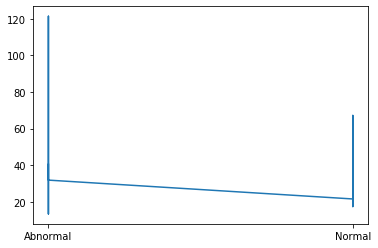

In [66]:
plt.plot(twoCdata['class'],twoCdata.sacral_slope)

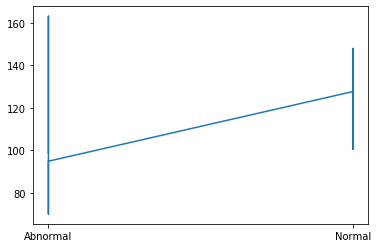

In [67]:
plt.plot(twoCdata['class'],twoCdata['pelvic_radius'])

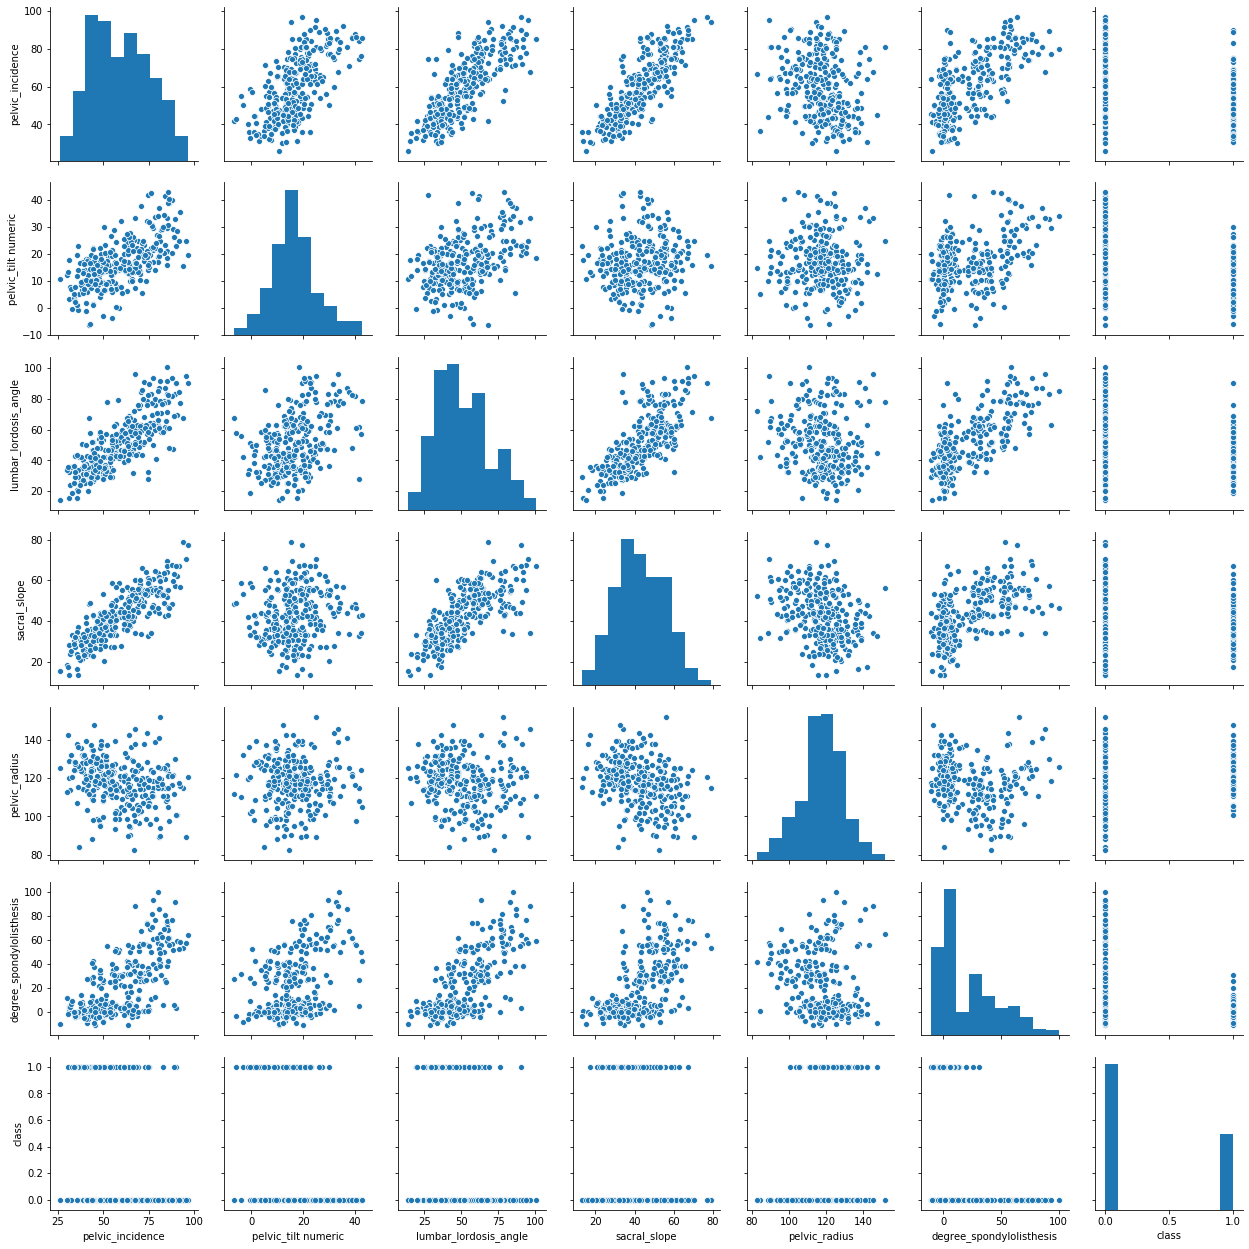

In [82]:
sns.pairplot(twoCdata)

In [87]:
twoCdata['class'].unique()

array([0, 1], dtype=int64)

In [88]:
twoCdata.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [89]:
twoCdata.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [90]:
twoCdata.describe(include = 'all')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,59.375004,16.650337,51.198196,42.724668,117.626651,21.360856,0.343643
std,16.061148,8.931979,18.182973,12.401190,11.934825,25.184554,0.475742
min,26.147921,-6.554948,14.000000,13.366931,82.456038,-11.058179,0.000000
25%,46.305243,10.600267,36.485185,33.353537,110.915740,1.362688,0.000000
50%,57.145851,15.853717,48.100000,42.473883,118.151531,8.235294,0.000000
75%,71.647899,21.189296,62.609599,52.647066,125.188759,38.107306,1.000000
max,96.657315,42.689195,100.744220,78.794052,151.839857,100.292107,1.000000


# Encode the Class variable to integer.

In [93]:
twoCdata.replace(['Abnormal','Normal'],[0,1],inplace=True)

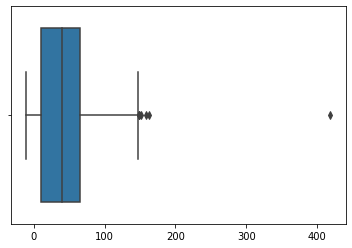

In [94]:
sns.boxplot(twoCdata)

In [95]:
# removing outliers
from scipy import stats
twoCdata = twoCdata[(np.abs(stats.zscore(twoCdata)) < 3).all(axis=1)]

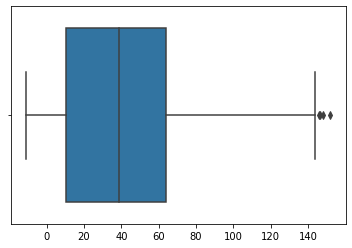

In [96]:
sns.boxplot(twoCdata)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [97]:
X = twoCdata.iloc[:,:-1]

In [98]:
Y = twoCdata.iloc[:,-1]

# Normalize your Data (X) to get values between 0 to 1.

In [99]:
from sklearn import preprocessing
preprocessing.normalize(X)

array([[ 0.47747441,  0.17084969,  0.30006338,  0.30662473,  0.74750793,
        -0.00192724],
       [ 0.30683541,  0.07904018,  0.19652338,  0.22779523,  0.89878075,
         0.03585728],
       [ 0.47319951,  0.1527454 ,  0.34436881,  0.32045411,  0.72861603,
        -0.02426987],
       ...,
       [ 0.39893156,  0.14734321,  0.29975311,  0.25158834,  0.81589576,
        -0.01758045],
       [ 0.32622463,  0.06266844,  0.29977024,  0.26355619,  0.85458978,
         0.00154812],
       [ 0.24745062,  0.03710111,  0.26792128,  0.21034951,  0.9062896 ,
        -0.00145691]])

In [100]:
X = preprocessing.normalize(X)

# Split the dat as train and test with a ratio of 70:30.

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

print(X_train.shape)

print(Y_train.shape)

print(X_test.shape)

print(Y_test.shape)

(208, 6)
(208,)
(90, 6)
(90,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn as sk

In [103]:
for k in [3,5,9]:
    model = sk.neighbors.KNeighborsClassifier(n_neighbors=k) #initilaize the model
    model.fit(X_train,Y_train)                               #fir the model
    y_pred = model.predict(X_test)                           #make prediction
    print(sk.metrics.accuracy_score(Y_test,y_pred))          #calculate accuracy

0.8
0.8333333333333334
0.8


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [104]:
for k in [3,5,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    print(model.score(X_train,Y_train))

0.8942307692307693
0.8653846153846154
0.8221153846153846


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [105]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 20, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, Y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(Y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))


The max accuracy and optimal number of neighbors is (0.8333333333333334, 7)


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [106]:
threeCdata =  pd.read_csv('3Classdata.csv')
threeCdata.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


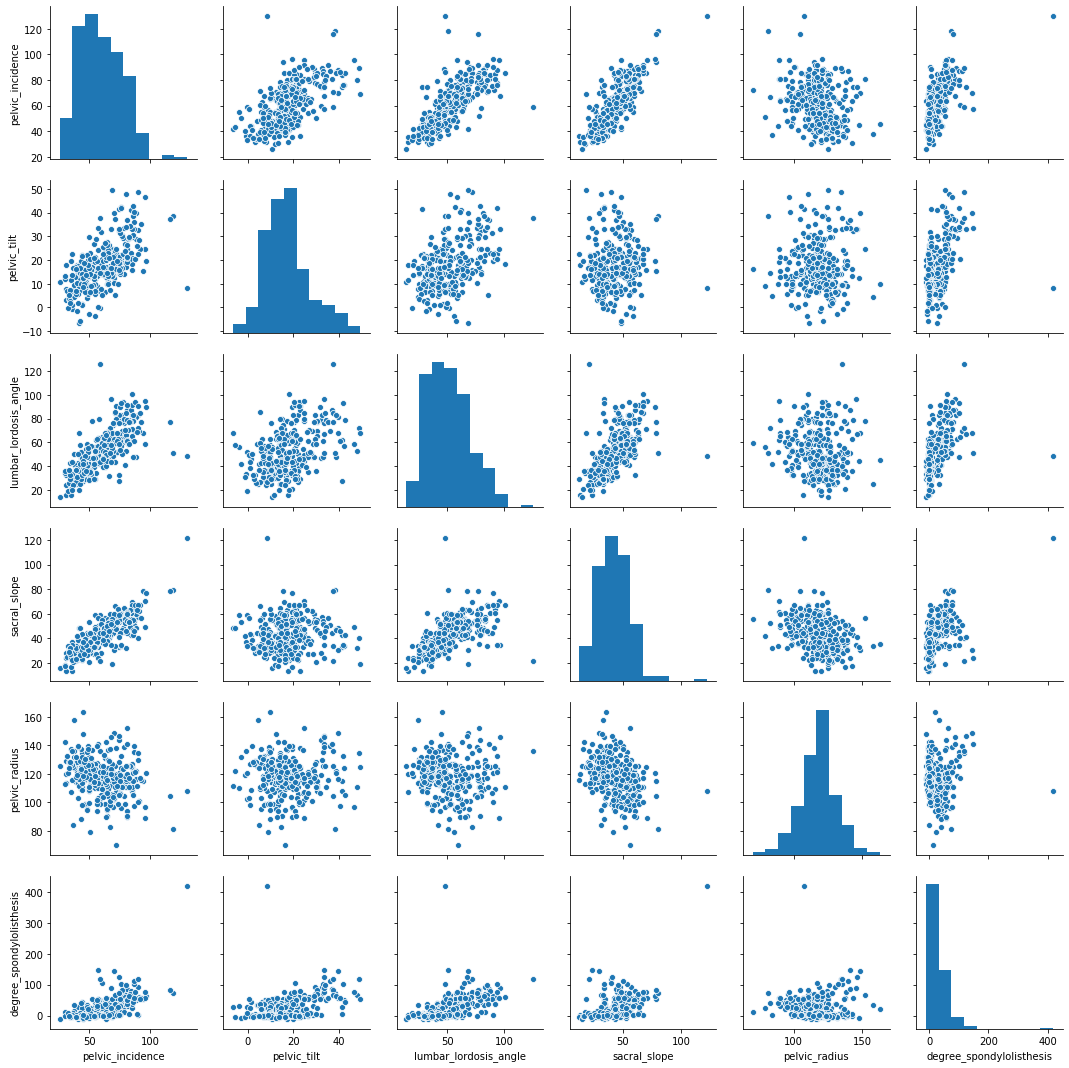

In [107]:
sns.pairplot(threeCdata)

In [108]:
threeCdata.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [109]:
threeCdata.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [110]:
threeCdata.describe(include='all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [111]:
threeCdata['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

# Encode the Class variable to integer.

In [112]:
threeCdata['class'].replace(['Hernia','Spondylolisthesis','Normal'],[0,1,2],inplace=True)

In [113]:
threeCdata['class'].unique()

array([0, 1, 2], dtype=int64)

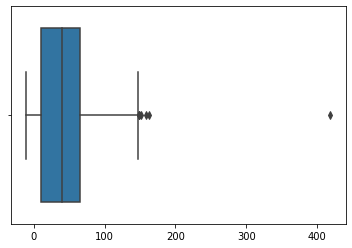

In [114]:
sns.boxplot(threeCdata)

In [115]:
#Removing outliers
threeCdata = threeCdata[(np.abs(stats.zscore(threeCdata)) < 3).all(axis=1)]

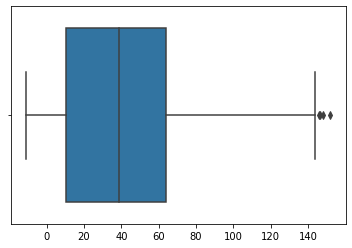

In [116]:
sns.boxplot(threeCdata)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [117]:
X = threeCdata.iloc[:,:-1]
Y = threeCdata.iloc[:,-1]

# Normalize your Data (X) to get values between 0 to 1.

In [118]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

# Split the dat as train and test with a ratio of 70:30.

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

print(X_train.shape)

print(Y_train.shape)

print(X_test.shape)

print(Y_test.shape)

(208, 6)
(208,)
(90, 6)
(90,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [120]:
for k in [3,5,9]:
    model = sk.neighbors.KNeighborsClassifier(n_neighbors=k) #initilaize the model
    model.fit(X_train,Y_train)                               #fir the model
    y_pred = model.predict(X_test)                           #make prediction
    print(sk.metrics.accuracy_score(Y_test,y_pred))          #calculate accuracy

0.7444444444444445
0.7444444444444445
0.7666666666666667


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [121]:
for k in [3,5,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    print(model.score(X_train,Y_train))

0.9038461538461539
0.875
0.8365384615384616


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [122]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 20, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, Y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(Y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))


The max accuracy and optimal number of neighbors is (0.8333333333333334, 19)
